# EDA

In [117]:
# Import Packages
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt


In [118]:
# Load the data
orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')


In [119]:
# Take a look at the data
#orders.head()
orders.sample(10)

# revisit/question: how to get dataframe expanded...


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
49277,44143,ZA-2015-LO7170147-42245,8/29/15,9/4/15,Standard Class,LO-7170147,Lori Olson,Corporate,NaN,Bulawayo,...,OFF-BI-2895,Office Supplies,Binders,"Acco Binder, Clear",$4.38,1,0.7,-$5.43,1.270,Medium
45845,32412,CA-2015-RA19915140-42357,12/19/15,12/24/15,Second Class,RA-199151404,Russell Applegate,Consumer,92024.0,Encinitas,...,TEC-AC-5147,Technology,Accessories,Logitech Illuminated - Keyboard,$119.98,2,0.0,$57.59,15.470,Medium
6297,36246,CA-2015-BD11320140-42336,11/28/15,12/3/15,Standard Class,BD-113201404,Bill Donatelli,Consumer,90045.0,Los Angeles,...,FUR-FU-4017,Furniture,Furnishings,Eldon 200 Class Desk Accessories,$18.84,3,0.0,$6.03,3.130,High
6573,12796,IT-2015-KC16675139-42263,9/16/15,9/20/15,Standard Class,KC-16675139,Kimberly Carter,Corporate,NaN,Bognor Regis,...,TEC-CO-4777,Technology,Copiers,"HP Ink, Color",$650.70,5,0.0,$169.05,51.980,High
34004,10049,US-2012-DW1348018-41000,4/1/12,4/5/12,Second Class,DW-1348018,Dianna Wilson,Home Office,NaN,Limoeiro do Norte,...,OFF-EN-3100,Office Supplies,Envelopes,"Ames Mailers, Recycled",$18.48,2,0.6,-$5.12,3.912,High
11447,8261,MX-2015-MM1828036-42320,11/12/15,11/12/15,Same Day,MM-1828036,Muhammed MacIntyre,Corporate,NaN,Santo Domingo,...,OFF-PA-3990,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",$81.84,5,0.2,-$17.46,28.162,Critical
11983,42645,CM-2015-DB297022-42151,5/27/15,5/30/15,Second Class,DB-297022,Darren Budd,Corporate,NaN,Bertoua,...,TEC-CO-4579,Technology,Copiers,"Hewlett Ink, Color",$150.12,1,0.0,$21.00,26.640,High
33282,16232,ES-2014-GM14455139-42004,12/31/14,1/7/15,Standard Class,GM-14455139,Gary Mitchum,Home Office,NaN,Redditch,...,OFF-ST-6229,Office Supplies,Storage,"Tenex Box, Industrial",$33.96,2,0.0,$15.96,4.170,Low
15052,11455,ES-2013-WB2185064-41587,11/9/13,11/13/13,Standard Class,WB-2185064,William Brown,Consumer,NaN,Taranto,...,OFF-EN-3670,Office Supplies,Envelopes,"Cameo Manila Envelope, Security-Tint",$147.00,5,0.0,$72.00,19.640,High
899,40387,US-2015-AH10210140-42291,10/14/15,10/16/15,First Class,AH-102101408,Alan Hwang,Consumer,40214.0,Louisville,...,OFF-ST-6315,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",$348.56,8,0.0,$104.57,116.690,High


In [120]:
# Get data # rows and columns
orders.shape

(51290, 24)

In [121]:
# Look at column types
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [122]:
orders.describe 
# revisit- do only on numerical features

<bound method NDFrame.describe of        Row.ID                  Order.ID Order.Date Ship.Date       Ship.Mode  \
0       40098  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
1       26341    IN-2014-JR162107-41675     2/5/14    2/7/14    Second Class   
2       25330    IN-2014-CR127307-41929   10/17/14  10/18/14     First Class   
3       13524   ES-2014-KM1637548-41667    1/28/14   1/30/14     First Class   
4       47221   SG-2014-RH9495111-41948    11/5/14   11/6/14        Same Day   
5       22732    IN-2014-JM156557-41818    6/28/14    7/1/14    Second Class   
6       30570   IN-2012-TS2134092-41219    11/6/12   11/8/12     First Class   
7       31192   IN-2013-MB1808592-41378    4/14/13   4/18/13  Standard Class   
8       40099  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
9       36258  CA-2012-AB10015140-40974     3/6/12    3/7/12     First Class   
10      36259  CA-2012-AB10015140-40974     3/6/12    3/7/12     First Class   
11    

In [152]:
# 1. Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 
orders['Profit'] = orders['Profit'].apply(lambda x: float(re.sub("[$,]","",x))) # From FS- revisit
orders['Sales'] = orders['Sales'].apply(lambda x: float(re.sub("[$,]","",x)))


In [153]:
# 2. Order date and ship date to datetime
orders['Order.Date'] = pd.to_datetime(orders['Order.Date']) # From FS- revisit
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])
orders.head()


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,2014


In [126]:
# 2. Create ship month and year
orders['month'] = orders['Ship.Date'].map(lambda x: x.month)
orders['year'] = orders['Ship.Date'].map(lambda x: x.year)
orders[['Ship.Date', 'month', 'year', 'Quantity']]
# note, using shipping as proxy for inventory changes


,Ship.Date,month,year,Quantity
0,2014-11-13,11,2014,2
1,2014-02-07,2,2014,9
2,2014-10-18,10,2014,9
3,2014-01-30,1,2014,5
4,2014-11-06,11,2014,8
5,2014-07-01,7,2014,5
6,2012-11-08,11,2012,4
7,2013-04-18,4,2013,6
8,2014-11-13,11,2014,2
9,2012-03-07,3,2012,1


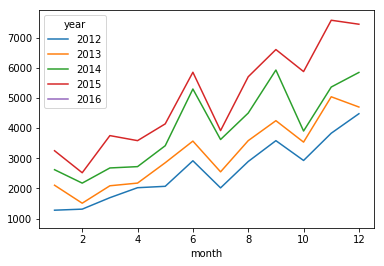

In [133]:
# 1. Is there any seasonal trend of inventory in the company? read inventory as sales
# Make a line graph per year to investigate seasonality
orders.groupby(['month','year']).sum()['Quantity'].unstack().plot()


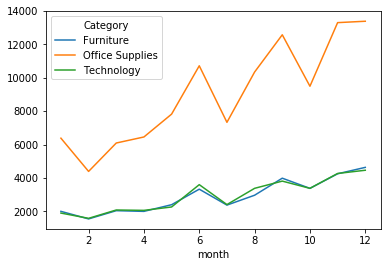

In [134]:
# 2. Is the seasonal trend the same for different categories?
orders.groupby(['month','Category']).sum()['Quantity'].unstack().plot()
# so seasonal trend holds across categories but is more pronounced for office supplies
# picks up early june and in time for school year and again for holidays

In [149]:
# 3. Returns
# Merge Returns dataset to Orders
returns.sample(10)
merged_df = pd.merge(orders, returns, how='left', left_on='Order.ID', right_on='Order ID')
merged_df.head()


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.77,High,11,2014,NaN,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.63,Critical,2,2014,NaN,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.49,Medium,10,2014,NaN,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.16,Medium,1,2014,NaN,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.04,Critical,11,2014,NaN,NaN,NaN


In [136]:
# 1. How much profit did we lose due to returns each year?
merged_df.groupby(['Returned', 'year']).sum()[['Profit']]

# technically should use order date and profit lost could be more refined calculation


Profit
Returned year          
Yes      2012  17284.46
         2013   9413.48
         2014  17293.76
         2015  17178.85
         2016    200.20

In [150]:
# 2. How many customer returned more than once? more than 5 times?
merged_df.loc[merged_df['Returned'] == 'Yes'].groupby(['Customer.ID', 'Customer.Name'])\
    .count()[['Returned']].sort_values(by=['Returned'], ascending=False).reset_index(drop=True)

# Note: could investigate Customer.ID vs. Customer.Name

# revisit


,Returned
0,13
1,11
2,10
3,10
4,9
5,9
6,8
7,8
8,8
9,8


In [137]:
# 3. Which regions are more likely to return orders?
merged_df['Returned'] = merged_df['Returned'].apply(lambda x: 1 if x=='Yes' else 0) # From FS
merged_df

# revisit


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year,Returned,Order ID,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.00,62.15,40.770,High,11,2014,0,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.10,-288.77,923.630,Critical,2,2014,0,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.10,919.97,915.490,Medium,10,2014,0,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.10,-96.54,910.160,Medium,1,2014,0,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.00,311.52,903.040,Critical,11,2014,0,NaN,NaN
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,5,0.10,763.28,897.350,Critical,7,2014,0,NaN,NaN
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,4,0.00,564.84,894.770,Critical,11,2012,0,NaN,NaN
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,6,0.00,996.48,878.380,High,4,2013,0,NaN,NaN
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.00,54.71,25.270,High,11,2014,0,NaN,NaN
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,1,0.20,5.48,11.130,High,3,2012,0,NaN,NaN


In [147]:
# 3. Which regions are more likely to return orders?
merged_df.groupby(['Region_x']).mean()[['Returned']].reset_index()\
    .sort_values('Returned', ascending=False)

# Output: by regions, Western US and Eastern Asia are most likely to return


,Region_x,Returned
22,Western US,0.055261
7,Eastern Asia,0.055181
17,Southern Europe,0.053005
15,Southern Africa,0.052301
18,Southern US,0.051235
9,Eastern US,0.047051
14,Southeastern Asia,0.044743
13,South America,0.044511
20,Western Asia,0.044262
12,Oceania,0.044164


In [148]:
# 4. Which categories (sub-categories) of products are more likely to be returned?
merged_df.groupby(['Sub.Category']).mean()[['Returned']].reset_index()\
    .sort_values('Returned', ascending=False)

# Output: Most likely to be returned, by sun-category: Labels, then Tables, then Accessories


,Sub.Category,Returned
10,Labels,0.052672
16,Tables,0.047619
0,Accessories,0.044878
2,Art,0.044613
6,Copiers,0.044534
3,Binders,0.043768
13,Phones,0.043193
4,Bookcases,0.043136
12,Paper,0.042955
5,Chairs,0.042807
